In [49]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
f = open('../../data/b3/NEG_BMF_20191126.TXT','r')

In [ ]:
# A primeira tarefa é ler o número de linhas do arquivo
# https://appdividend.com/2019/02/03/how-to-convert-python-string-to-int-and-int-to-string/
f.seek(45)
nlines = int(f.read(9))-2 # desconta cabeçalho e rodapé

In [ ]:
# O segundo passo é iterar o arquivo e criar o index.
f.seek(55)
data = []

ticker = ''
nstart = 0
nend = 0
for nline in range(nlines):
    line = f.readline() # aqui já atualiza a posição do seek
    ticker_ = line[11:61]
    if ticker_ != ticker:
        data.append([ticker, nstart, nend])
        ticker = ticker_
        nstart = nline
    nend = nline
data.pop(0) # remove o primeiro item que é garbage

In [ ]:
# Cria um dataframe com os dados do index
idf = pd.DataFrame(data, columns=['Ticker', 'Linicial', 'Lfinal'])
# https://stackoverflow.com/questions/37351183/how-to-parse-all-the-values-in-a-column-of-a-dataframe
idf['Ticker'] = idf.Ticker.str.replace(' ','')
# Antes de transformar a coluna Ticker em Index do dataframe, precisamos dar um parse para remover espaços em branco
idf = idf.set_index('Ticker')
# https://stackoverflow.com/questions/22211737/how-to-sort-a-pandas-dataframe-by-index
idf.sort_index(inplace=True)
idf.to_csv('index.txt', header=None, sep=' ', mode='w')

In [3]:
# uso do long line break
# https://doingmathwithpython.github.io/breaking-long-lines-in-python.html
# ter em mente os parâmetros de read_csv
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

i = pd.read_csv('../../data/b3/NEG_BMF_20191126_index.TXT', header = None, sep = ' ', index_col = 0, \
                names = ['Linicial', 'Lfinal'])

In [83]:
ticker = 'INDZ19'
Linicial = i.loc[ticker].iloc[0]['Linicial']
Lfinal = i.loc[ticker].iloc[0]['Lfinal']
print(Linicial)
print(Lfinal)

822900
842247


In [84]:
f.seek(23)
dia = f.read(10)

start = 55
linesize = 238

data = []

for line_n in range(Linicial, Lfinal+1):
    f.seek(start+line_n*linesize)
    line = f.readline()
    # Preço, Quantidade, Time
    data.append([ \
        line[74:74+19], \
        line[94:94+18], \
        dia + ' ' + line[113:113+12]
    ])


In [113]:
# Create Book Negotiated Dataframe
bneg = pd.DataFrame(data, columns=['Price', 'Quant', 'Timestamp'])
# Para converter de string para int, ou seja, fazer o parse da coluna de um dataframe
# https://datatofish.com/convert-string-to-float-dataframe/
# https://stackoverflow.com/questions/31790287/convert-pandas-dataframe-column-from-string-to-int-based-on-conditional
# https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime-dd-mm-yyyy-format
bneg['Price'] = bneg['Price'].astype(float)
bneg['Quant'] = bneg['Quant'].astype(int)
bneg['Timestamp'] = pd.to_datetime(bneg['Timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
bneg = bneg.set_index('Timestamp')
# Create Book Negotiated Series # Não tem como criar uma Series com duas colunas e um index.

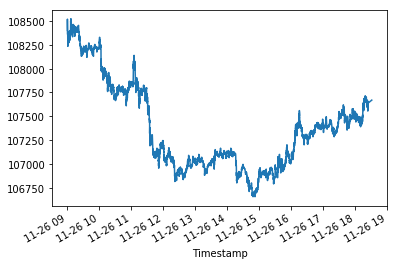

In [103]:
prices = pd.Series(bneg['Price'].tolist(), index = bneg['Timestamp'])
prices.plot()

In [115]:
# aqui eu salvo um arquivo de log para analisar com mais calma
bneg.to_csv('book.txt', sep = ' ', mode = 'w')

In [116]:
# aqui vou salvar um pedaço do book pra analisar com mais calma
start = 55
linesize = 238

of = open('output.txt','w')

for line_n in range(Linicial, Lfinal+1):
    f.seek(start+line_n*linesize)
    line = f.readline()
    of.write(line)

of.close()

In [114]:
bneg

,Price,Quant
Timestamp,,
2019-11-26 09:00:41.127,108400.0,5
2019-11-26 09:00:41.127,108400.0,5
2019-11-26 09:00:41.127,108400.0,5
2019-11-26 09:00:41.127,108400.0,5
2019-11-26 09:00:41.127,108400.0,5
2019-11-26 09:00:41.127,108400.0,5
2019-11-26 09:00:41.127,108400.0,20
2019-11-26 09:00:41.127,108400.0,5
2019-11-26 09:00:41.127,108400.0,5


In [73]:
# Como transformar string em data
# http://www.learningaboutelectronics.com/Articles/How-to-create-a-time-object-in-Python.php
# https://www.journaldev.com/23365/python-string-to-datetime-strptime#string-to-time-object
# engraçado como datetime só guarda microsegundos, solução em
# https://stackoverflow.com/questions/698223/how-can-i-parse-a-time-string-containing-milliseconds-in-it-with-python
t = '09:00:47.140'
time_object = dt.datetime.strptime(t, '%H:%M:%S.%f').time()
print(type(time_object))
print(time_object)
t2 = '2019-11-26 15:53:44.913'
time_object2 = dt.datetime.strptime(t2, '%Y-%m-%d %H:%M:%S.%f')
print(type(time_object2))
print(time_object2)

<class 'datetime.time'>
09:00:47.140000
<class 'datetime.datetime'>
2019-11-26 15:53:44.913000
